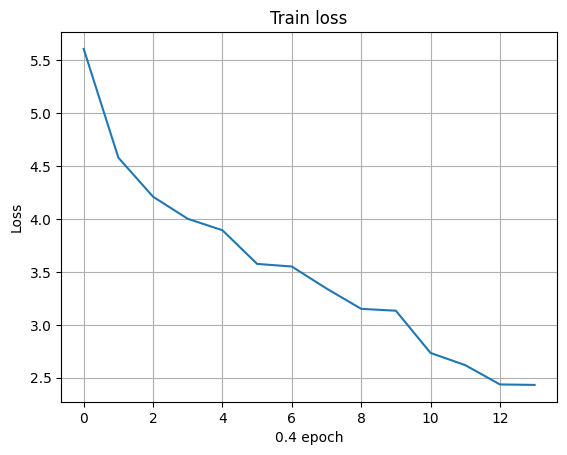

In [1]:
import matplotlib.pyplot as plt

# Пример массива лосса
loss_values = [5.604, 4.5772, 4.2089, 4.0006, 3.8924, 3.5748, 3.55, 3.3425, 3.1505, 3.1328, 2.7342, 2.6193, 2.437, 2.4324]

# Построение графика
plt.plot(loss_values)
plt.xlabel('0.4 epoch')
plt.ylabel('Loss')
plt.title('Train loss')
plt.grid(True)
plt.show()

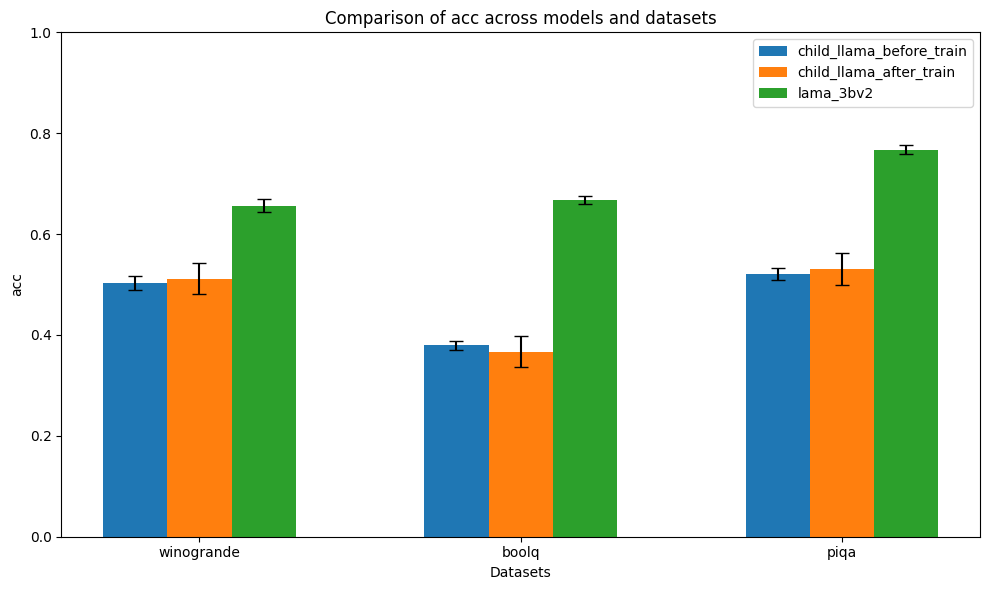

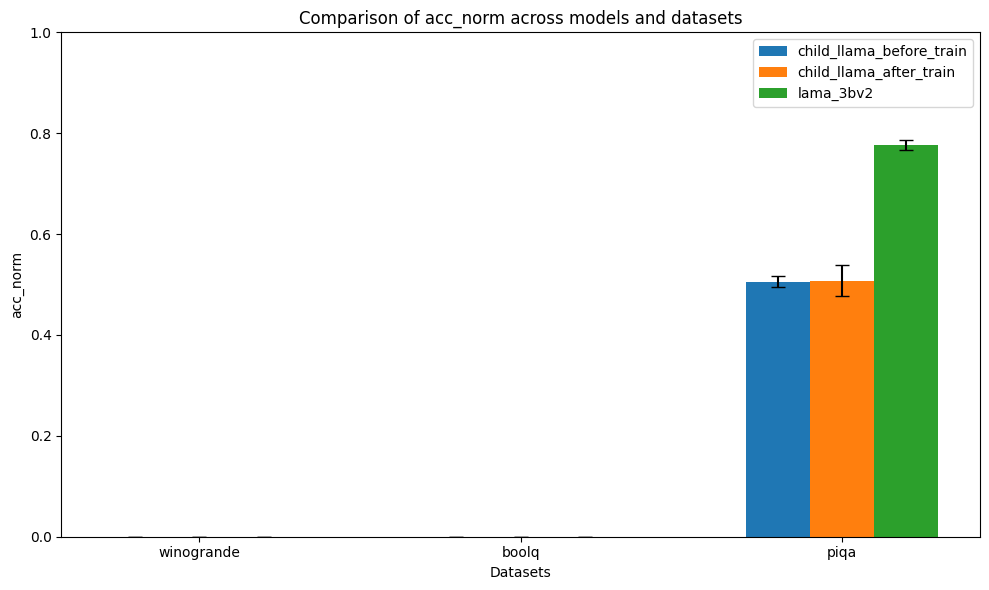

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Данные
data = {
    'child_llama_before_train': {
        'winogrande': {'acc': 0.5027624309392266, 'acc_stderr': 0.014052271211616438},
        'boolq': {'acc': 0.37920489296636084, 'acc_stderr': 0.008486012137246294},
        'piqa': {'acc': 0.5201305767138193, 'acc_stderr': 0.011656365410780368, 'acc_norm': 0.5059847660500544, 'acc_norm_stderr': 0.011664988455853328}
    },
    'child_llama_after_train': {
        'winogrande': {'acc': 0.51171875, 'acc_stderr': 0.031302613490991796},
        'boolq': {'acc': 0.3671875, 'acc_stderr': 0.030186403889489913},
        'piqa': {'acc': 0.53125, 'acc_stderr': 0.03125, 'acc_norm': 0.5078125, 'acc_norm_stderr': 0.03130739215119687}
    },
    'lama_3bv2': {
        'winogrande': {'acc': 0.656669297, 'acc_stderr': 0.0133448231},
        'boolq': {'acc': 0.667278287, 'acc_stderr': 0.00824112},
        'piqa': {'acc': 0.7676822633297062, 'acc_stderr': 0.009853201384168243, 'acc_norm': 0.7763873775843307, 'acc_norm_stderr': 0.009721489519176283}
    }
}

# Преобразование данных для построения графиков
datasets = ['winogrande', 'boolq', 'piqa']
models = ['child_llama_before_train', 'child_llama_after_train', 'lama_3bv2']

# Функция для построения графиков
def plot_metric(metric):
    fig, ax = plt.subplots(figsize=(10, 6))

    bar_width = 0.2
    index = np.arange(len(datasets))

    for i, model in enumerate(models):
        values = []
        errors = []

        for dataset in datasets:
            if dataset in data[model] and metric in data[model][dataset]:
                values.append(data[model][dataset][metric])
                errors.append(data[model][dataset][f"{metric}_stderr"])
            else:
                values.append(0)
                errors.append(0)

        ax.bar(index + i * bar_width, values, bar_width, yerr=errors, label=model, capsize=5)

    ax.set_xlabel('Datasets')
    ax.set_ylabel(metric)
    ax.set_title(f'Comparison of {metric} across models and datasets')
    ax.set_xticks(index + bar_width)
    ax.set_xticklabels(datasets)
    ax.legend()
    ax.set_ylim(0, 1)

    plt.tight_layout()
    plt.show()

# Построение графиков для acc и acc_norm
plot_metric('acc')
plot_metric('acc_norm')
